In [0]:
# ファイルアップロード用
from google.colab import files
files.upload()

In [0]:
# データの件数確認用
import pandas as pd
from pandas import DataFrame

train = pd.read_csv("train_data.csv", encoding="utf-8")
test = pd.read_csv("test_data.csv", encoding="utf-8")

print(train.info())
print(test.info())
print(train.nunique())
print(test.nunique())

説明変数 ： ['Sex' 'Age']
正解数 ： 77 件
正解率 ： 77.0 %

予測値 ： [0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0] 

正解値 ： [0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0
 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0] 

変数重要度


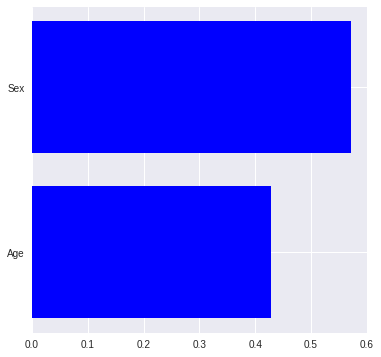

In [56]:
# pythonで機械学習を実行するために必要なライブラリ

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from pandas import DataFrame

# ----メイン関数----
def main():
    train = pd.read_csv("train_data.csv", encoding="utf-8")
    test = pd.read_csv("test_data.csv", encoding="utf-8")
    res = pd.read_csv("result_data.csv", encoding="utf-8")

    # ----機械学習用にデータを調整----
    # 機械学習の説明変数に使う列を指定する
    # "Survived","Sex", "Age","SibSp","Parch","Embarked","Pclass","Fare"から指定
    # trainデータのみ目的変数も指定しておく
    train = train[["Survived","Sex", "Age"]]
    test = test[["Sex", "Age"]]
    
    # ----機械学習の実行----
    # 説明変数をtrain_Xに、目的変数をtrain_yに格納する
    train_X = train.drop("Survived", axis=1)
    train_y = train.Survived
    
    # ランダムフォレストで学習し、モデルを作成する
    clf = RandomForestClassifier(random_state=0)
    clf = clf.fit(train_X, train_y)
    
    # ----予測結果の評価----
    # 作成したモデルを使用し、titanicの生存者かどうか(テストデータの目的変数)を予測する
    # 正解データの値を取得し、比較して結果を出力する
    my_prediction = clf.predict(test)
    res_prediction = np.array(res["Survived"]).astype(int)
    
    ressum = np.sum(my_prediction == res_prediction)
    
    print("説明変数 ：",train_X.columns.values)
    print("正解数 ：",ressum,"件")
    print("正解率 ：",ressum / len(res_prediction) * 100,"%\n")

    print("予測値 ：",my_prediction,"\n")
    print("正解値 ：",res_prediction,"\n")
    
    randamforest_importance(train_X,clf)
    
def randamforest_importance(train_X,clf): 
    features = train_X.columns
    importances = clf.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(6,6))
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), features[indices])
    print("変数重要度")
    plt.show()
    
# 処理実行
main()